In [1]:
# import required lib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Load data from all the sources

In [47]:
#Read the data
orders_all = pd.read_csv("perf_test_orderdata/orders_all.csv")
orders_times = pd.read_csv("perf_test_orderdata/orders_times.csv")

In [48]:
#join the column to connect the two csv data
merge = pd.merge(orders_all,orders_times,how='left',on='admin_reference')

In [49]:
#load product data collected from API
products = pd.read_csv("products.csv")

# Prepare Data

In [50]:
#drop the features which has most null values
orders = merge.drop(['completed_at_x','customer_company','bill_state_name','ship_state_name','ship_company','subsite_store','campaign_code','bill_company'],axis=1)

In [51]:
#for campaign 
campaign_code = merge.drop(['completed_at_x','customer_company','bill_state_name','ship_state_name','ship_company','subsite_store','bill_company'],axis=1)

In [52]:
#prepasre the dat 
def prep_data(data):
    #Date and time is splitted
    new = data["completed_at_y"].str.split(" ", n = 1, expand = True) 
    data['Date'] = new[0]
    data['Time'] = new[1]
    #Day, month and year is splitted
    new = data["Date"].str.split("-", n = 2, expand = True) 
    data['Year'] = new[0]
    data['Month'] = new[1]
    data['Day'] = new[2]
    #drop null values
    data = data.dropna()
    #convert month number to month name
    data['Month'] = data['Month'].astype(int).apply(lambda x: calendar.month_abbr[x])
    #Date and time is splitted
    new = data["Time"].str.split(":", n = 1, expand = True) 
    data['Hour'] = new[0]
    data['Minute'] = new[1]

    data['Date'] = pd.to_datetime(data['Date'])  # Step 1
    data['DayofWeek'] =data['Date'].dt.day_name()  # Step 2
    return data

In [53]:
orders = prep_data(orders)
campaign_code = prep_data(campaign_code)

In [54]:
#update values in orders table
# orders['group_name'] = None
# orders.update(products)

In [55]:
orders = orders.drop([ 'state', 'shipment_state',
       'currency', 'bill_zipcode',
       'ship_city', 'ship_zipcode', 'ship_country_iso_name'],axis=1)

In [56]:
orders.head(2)

,admin_reference,payment_state,total,bill_city,bill_country_iso_name,product_name,quantity,sku,completed_at_y,Date,Time,Year,Month,Day,Hour,Minute,DayofWeek
1,O160651894,paid,97.21,Hafrsfjord,NO,AROMA Svartvinbärstoppar 900g,1,WEB7098,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,09,08,Thursday
2,O160651894,paid,97.21,Hafrsfjord,NO,AROMA HALLON & LAKRITSBÅTAR 900G 2:a sor,1,WEB7080,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,09,08,Thursday


In [57]:
products = products.drop(['ID', 'product_id', 'ean', 'is_master', 'weight',
       'reference', 'source_owner', 'source_id', 'best_price', 'stock_available_qty', 'sku_api',
       'group_description', 'group_properties','current_price'],axis=1)

In [58]:
products.head(2)

,sku,name,stock_qty,group_name
0,COC520,Monster Lewis Hamilton 50 cl x 24 st,54,Energidryck
1,SÄL427025,SMAKIS APELSIN KRAV BRICK 25CL - 27 st,18,web-shop-products


In [59]:
#Months
Month = orders['Month'].unique().tolist()
Year = orders['Year'].unique().tolist()
DayofWeek = orders['DayofWeek'].unique().tolist()
Day = orders['Day'].unique().tolist()
Hour = orders['Hour'].unique().tolist()

# New plots!

### How does the sales in countries over the past years

1. Sweden has the best sales in year 2020, and sales are increasing evry year.
2. 2020 Denmark & Norway sales has decreased from the previous years.
3. Finland has the least sales compared to other countries.

Text(0.5, 0, 'Country')

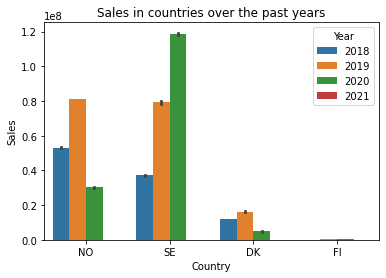

In [16]:
#How does the sales in countries over the past years
sns.barplot(x="bill_country_iso_name", y="total", hue="Year",data =orders, estimator=sum)
plt.title("Sales in countries over the past years")
plt.ylabel("Sales")
plt.xlabel("Country")

### Which countries have the best yearly sales 
##### Norway has the best sales in 2018 & 2019 

Text(0.5, 0, 'Year')

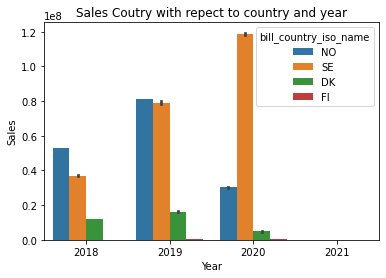

In [17]:
#Which countries have the best yearly sales 
sns.barplot(x="Year", y="total", hue="bill_country_iso_name",data =orders, estimator=sum)
plt.title("Sales Coutry with repect to country and year")
plt.ylabel("Sales")
plt.xlabel("Year")

Text(0.5, 0, '')

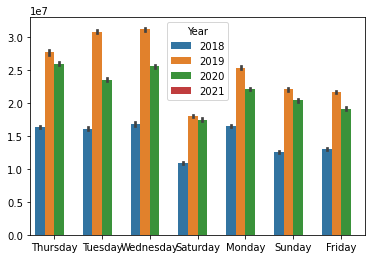

In [18]:
#
sns.barplot(x="DayofWeek", y="total", hue="Year",data =orders, estimator=sum)
plt.title("")
plt.ylabel("")
plt.xlabel("")

### Which day has the highest yearly sales
1. In 2019, Wednesday has the highest number of sales.
2. In 2018 & 2020, Wedenesday and Thursday has the highest sales.
3. Saturday has the least yearly sales.

Text(0.5, 0, 'Day of the week')

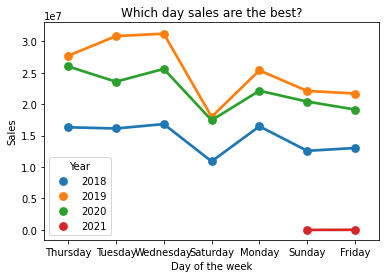

In [19]:
#Which day has the highest yearly sales
sns.pointplot(x="DayofWeek", y="total", hue="Year",data =orders, estimator=sum)
plt.title("Which day sales are the best?")
plt.ylabel("Sales")
plt.xlabel("Day of the week")

### Overall: Which day has the highest sales? Wednesday

Text(0.5, 0, 'Day of the week')

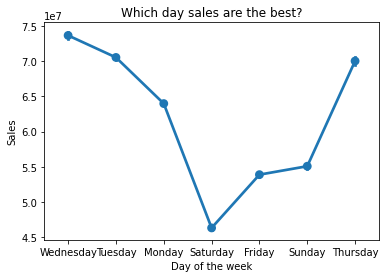

In [30]:
#Overall: Which day has the highest sales? Wednesday
sns.pointplot(x="DayofWeek", y="total", data=orders, estimator=sum)
plt.title("Which day sales are the best?")
plt.ylabel("Sales")
plt.xlabel("Day of the week")

Text(0.5, 0, 'Hour')

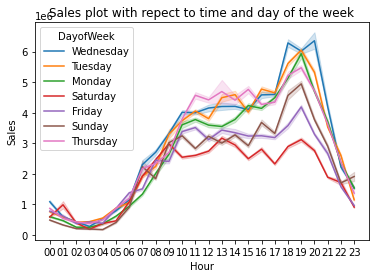

In [31]:
sns.lineplot(x='Hour',y='total',hue = 'DayofWeek', data=orders,estimator = sum)
plt.title("Sales plot with repect to time and day of the week")
plt.ylabel("Sales")
plt.xlabel("Hour")

### 17:00-21:00 is the time where the most of the sales. which is a maximum likelihood of hours.

### Which city and country has the highest sales when the maximum likelihood of hours and Day of the week?

In [22]:
orders.head(2)

,admin_reference,payment_state,total,bill_city,bill_country_iso_name,product_name,quantity,sku,completed_at_y,Date,Time,Year,Month,Day,Hour,Minute,DayofWeek
1,O160651894,paid,97.21,Hafrsfjord,NO,AROMA Svartvinbärstoppar 900g,1,WEB7098,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,09,08,Thursday
2,O160651894,paid,97.21,Hafrsfjord,NO,AROMA HALLON & LAKRITSBÅTAR 900G 2:a sor,1,WEB7080,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,09,08,Thursday


In [23]:
#This can be used to order the x axis before plotting
orders = orders.sort_values(['Hour']).reset_index(drop=True)

In [24]:
like_Hours = ['16','17','18','19','20','21']
like_DayofWeek = ['Tuesday','Wednesday','Thursday','Monday']

Text(0.5, 0, 'Sales')

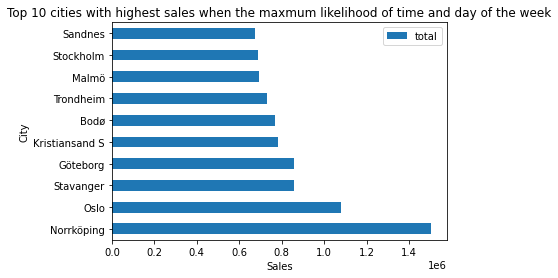

In [25]:
orders[orders.Hour.isin(like_Hours)&orders.DayofWeek.isin(like_DayofWeek)].groupby(by = ['bill_city']).sum().sort_values(by = ['total'],ascending=False).drop(['quantity'],axis=1).head(10).plot.barh()
plt.title("Top 10 cities with highest sales when the maxmum likelihood of time and day of the week")
plt.ylabel("City")
plt.xlabel("Sales")

Text(0.5, 0, 'Country')

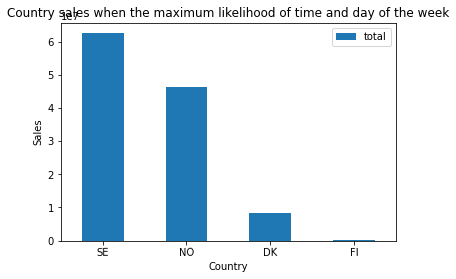

In [26]:
orders[orders.Hour.isin(like_Hours)&orders.DayofWeek.isin(like_DayofWeek)].groupby(by = ['bill_country_iso_name']).sum().sort_values(by = ['total'],ascending=False).drop(['quantity'],axis=1).plot.bar(rot=1)
plt.title("Country sales when the maximum likelihood of time and day of the week")
plt.ylabel("Sales")
plt.xlabel("Country")

### Which products has the highest sales when the maximum likelihood of hours and Day of the week?

Text(0.5, 0, 'Order Count')

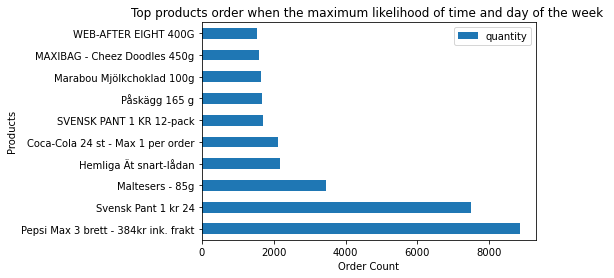

In [27]:
#product plot
orders[orders.Hour.isin(like_Hours)&orders.DayofWeek.isin(like_DayofWeek)].groupby(by = ['product_name']).sum().sort_values(by = ['quantity'],ascending=False).drop(['total'],axis=1).head(10).plot.barh()
plt.title("Top products order when the maximum likelihood of time and day of the week ")
plt.ylabel("Products")
plt.xlabel("Order Count")

# Level 1

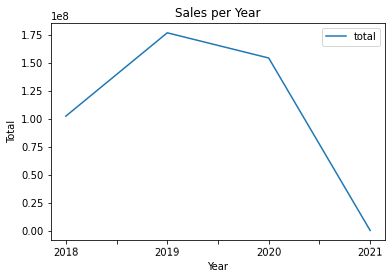

In [34]:
#sales by year
orders.groupby(by=["Year"]).sum().drop(['quantity'],axis=1).sort_values(by=['Year'], ascending=True).plot.line(rot=1)
plt.title("Sales per Year")
plt.xlabel("Year")
plt.ylabel("Total")
plt.show()

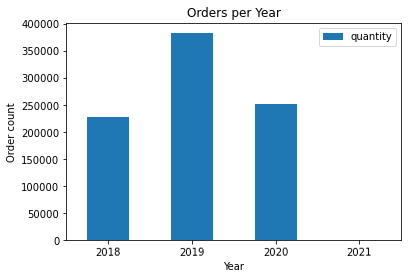

In [38]:
#How many Orders by Year
orders.groupby(by=["Year"]).count().drop(['admin_reference', 'payment_state', 'total', 'bill_city', 'bill_country_iso_name', 'product_name', 'sku', 'completed_at_y', 'Date', 'Time', 'Month','Day', 'Hour', 'Minute', 'DayofWeek'],axis=1).sort_values(by=['Year'], ascending=True).plot.bar(rot=1)
plt.title("Orders per Year")
plt.xlabel("Year")
plt.ylabel("Order count")
plt.show()

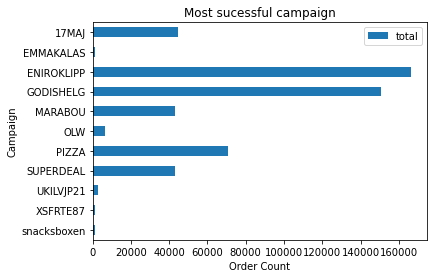

In [69]:
merge.groupby(by=["campaign_code"]).sum().drop(["completed_at_x","customer_company","bill_state_name","ship_state_name","quantity"],axis=1).sort_values(by=['campaign_code'], ascending=False).plot.barh()
plt.title("Most sucessful campaign")
plt.xlabel("Order Count")
plt.ylabel("Campaign")
plt.show()

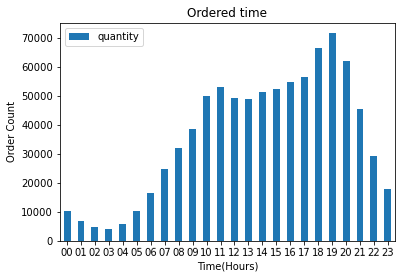

In [45]:
#How many orders per hour
orders.groupby(by=["Hour"]).count().drop(['admin_reference', 'payment_state', 'total', 'bill_city', 'bill_country_iso_name', 'product_name', 'sku','Year', 'completed_at_y', 'Date', 'Time', 'Month','Day', 'Minute', 'DayofWeek'],axis=1).sort_values(by=['Hour'], ascending=True).plot.bar(rot=1)
plt.title("Ordered time")
plt.ylabel("Order Count")
plt.xlabel("Time(Hours)")
plt.show()

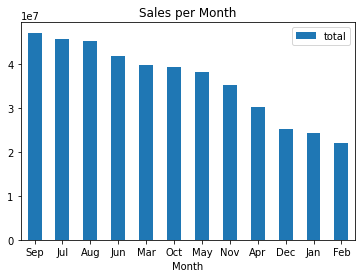

In [71]:
#sales by month
orders.groupby(by=["Month"]).sum().drop(['quantity'],axis=1).sort_values(by=['total'], ascending=False).plot.bar(rot=0)
plt.title("Sales per Month")
plt.xlabel("Month")
plt.show()

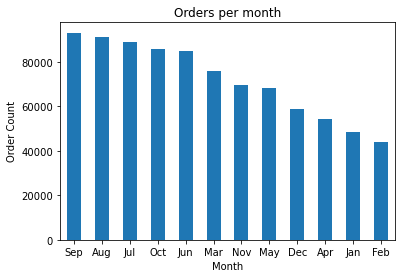

In [47]:
#How many Orders by Month
orders.Month.value_counts().plot.bar(rot=0)
plt.title("Orders per month")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.show()

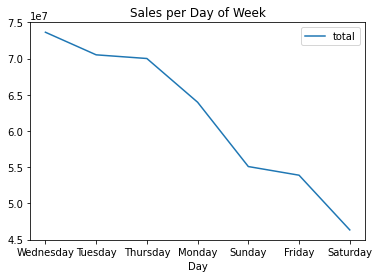

In [48]:
#How many sales by day
orders.groupby(by=["DayofWeek"]).sum().drop(['quantity'],axis=1).sort_values(by=['total'], ascending=False).plot.line()
plt.title("Sales per Day of Week")
plt.xlabel("Day")
plt.show()

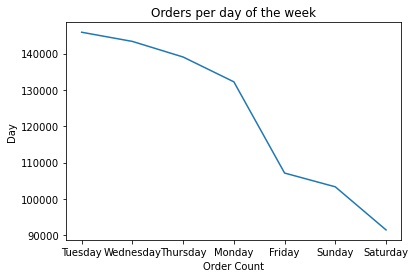

In [49]:
#How many orders per day of the week
orders.DayofWeek.value_counts().plot.line()
plt.title("Orders per day of the week")
plt.xlabel("Order Count")
plt.ylabel("Day")
plt.show()

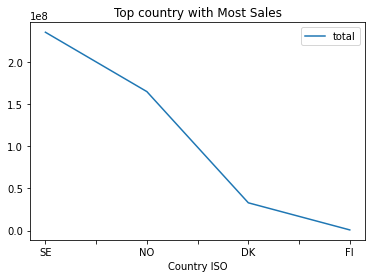

In [50]:
#Top country with highest sales
orders.groupby(by=['bill_country_iso_name']).sum().drop(['quantity'],axis=1).sort_values(by=['total'], ascending=False).plot.line()
plt.title("Top country with Most Sales")
plt.xlabel("Country ISO")
plt.show()

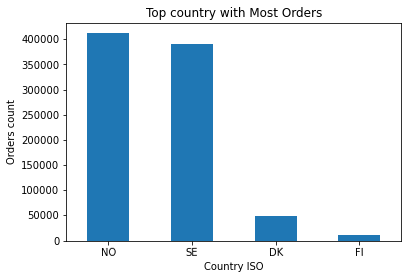

In [52]:
#Top country with Most Orders
orders.bill_country_iso_name.value_counts().plot.bar(rot=1)
plt.title("Top country with Most Orders")
plt.xlabel("Country ISO")
plt.ylabel("Orders count")
plt.show()

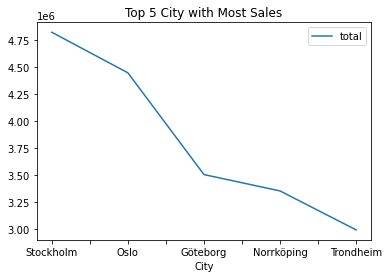

In [53]:
#Top city by sales
orders.groupby(by=["bill_city"]).sum().drop(['quantity'],axis=1).sort_values(by=['total'], ascending=False).head(5).plot.line()
plt.title("Top 5 City with Most Sales")
plt.xlabel("City")
plt.show()

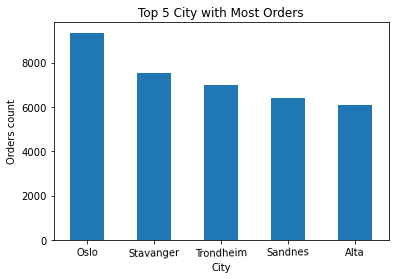

In [54]:
#Top city by orders
orders.bill_city.value_counts().head(5).plot.bar(rot=1)
plt.title("Top 5 City with Most Orders")
plt.xlabel("City")
plt.ylabel("Orders count")
plt.show()

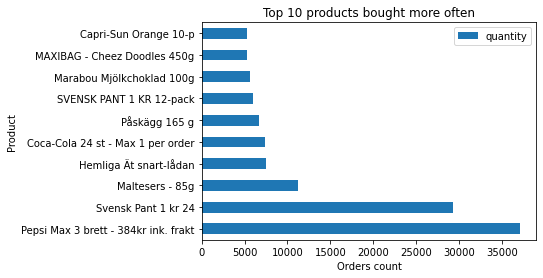

In [55]:
#Most bought Products
orders.groupby(by=["product_name"]).sum().drop(['total'],axis=1).sort_values(by=['quantity'], ascending=False).head(10).plot.barh()
plt.title("Top 10 products bought more often")
plt.xlabel("Orders count")
plt.ylabel("Product")
plt.show()

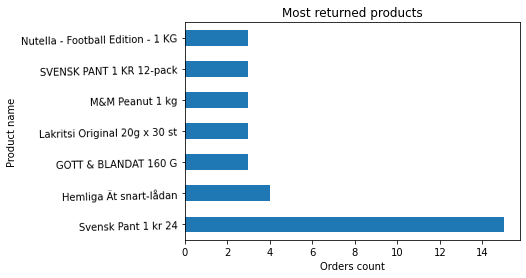

In [57]:
#Most returned or Cancelled products
orders.loc[orders['payment_state']=='refunded'].product_name.value_counts(ascending=False).head(7).plot.barh(rot=1)
plt.title("Most returned products")
plt.xlabel("Orders count")
plt.ylabel("Product name")
plt.show()

In [60]:
#Most backordered products
# orders.loc[orders['shipment_state']=='backordered'].product_name.value_counts(ascending=False).head(7).plot.barh(rot=1)
# plt.title("Most Back Ordered products")
# plt.xlabel("Orders count")
# plt.ylabel("Product name")
# plt.show()

In [73]:
#product with no stocks
list(products.loc[products['stock_qty'] == 0].name)

['FIZZYPOP PÅSE 80G - 5 st',
 'OLW Cheez Doodles 160g',
 'Jättesalt Påse – 5 st',
 'Giant Candy Canes Starwars 50g - 5 st',
 'FIZZYPOP PÅSE 80G - 5 st',
 'OLW Cheez Doodles 160g',
 'Jättesalt Påse – 5 st',
 'Giant Candy Canes Starwars 50g - 5 st',
 'WEB-NICK´S KEXBAR 40G']

# Level 2

## Type 1: Using Year as legend

Text(0.5, 0, 'Month')

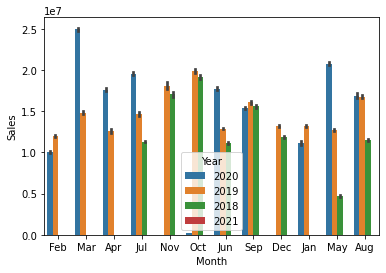

In [74]:
#A plot sales vs month with Year
sns.barplot(x="Month", y="total", hue="Year",data =orders, estimator=sum)
plt.title("Monthly sales with respect to year")
plt.ylabel("Sales")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

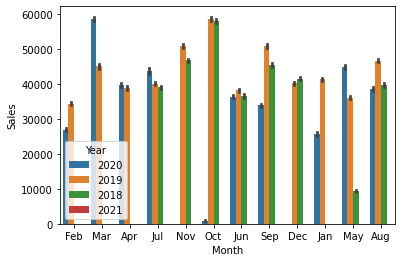

In [80]:
#A plot 
sns.barplot(x="Month", y="quantity", hue="Year",data =orders, estimator=sum)
plt.title("Monthly orders with respect to year")
plt.ylabel("Orders")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

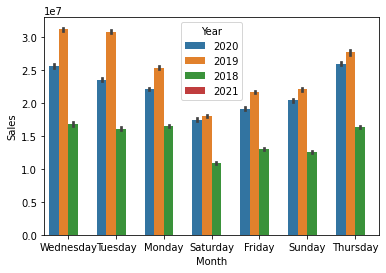

In [75]:
sns.barplot(x="DayofWeek", y="total", hue="Year",data =orders, estimator=sum)
plt.title("Day sales with respect to year")
plt.ylabel("Sales")
plt.xlabel("Day of the week")

Text(0.5, 0, 'Day of the week')

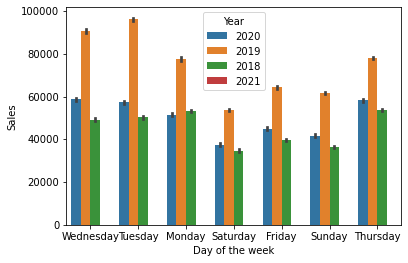

In [81]:
sns.barplot(x="DayofWeek", y="quantity", hue="Year",data =orders,estimator=sum)
plt.title("Day orders with respect to year")
plt.ylabel("Orders")
plt.xlabel("Day of the week")

Text(0.5, 0, 'Country')

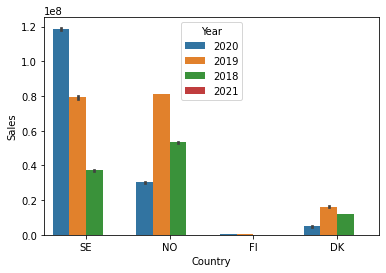

In [76]:
sns.barplot(x="bill_country_iso_name", y="total", hue="Year",data =orders, estimator=sum)
plt.title("Country sales with respect to year")
plt.ylabel("Sales")
plt.xlabel("Country")

Text(0.5, 0, 'Country')

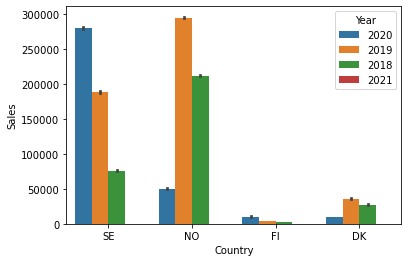

In [82]:
sns.barplot(x="bill_country_iso_name", y="quantity", hue="Year",data =orders,estimator=sum)
plt.title("Country orders with respect to year")
plt.ylabel("Orders")
plt.xlabel("Country")

## Type 2: Using Country as legend

Text(0.5, 0, 'Month')

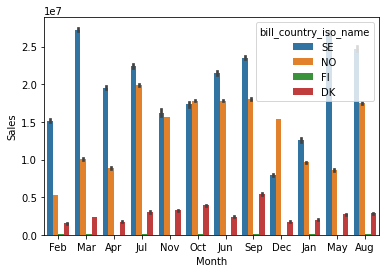

In [83]:
sns.barplot(x="Month", y="total", hue="bill_country_iso_name",data =orders, estimator=sum)
plt.title("Monthly sales with respect to Country")
plt.ylabel("Sales")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

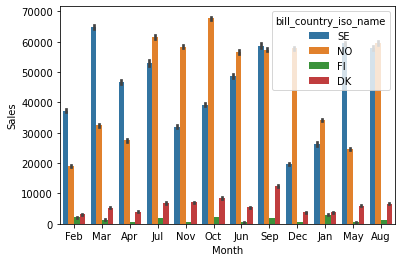

In [84]:
sns.barplot(x="Month", y="quantity", hue="bill_country_iso_name",data =orders, estimator=sum)
plt.title("Monthly sales with respect to Country")
plt.ylabel("Orders")
plt.xlabel("Month")

Text(0.5, 0, 'Day of the week')

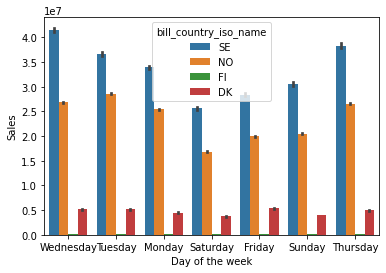

In [85]:
sns.barplot(x="DayofWeek", y="total", hue="bill_country_iso_name",data =orders, estimator=sum)
plt.title("Day sales with respect to Country")
plt.ylabel("Sales")
plt.xlabel("Day of the week")

Text(0.5, 0, 'Day of the week')

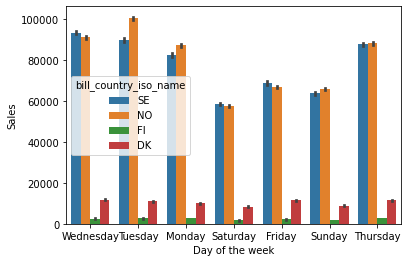

In [86]:
sns.barplot(x="DayofWeek", y="quantity", hue="bill_country_iso_name",data =orders,estimator=sum)
plt.title("Day orders with respect to Country")
plt.ylabel("Orders")
plt.xlabel("Day of the week")

Text(0.5, 0, 'Year')

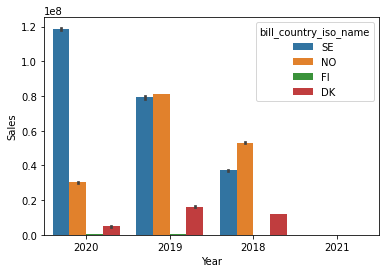

In [87]:
sns.barplot(x="Year", y="total", hue="bill_country_iso_name",data =orders, estimator=sum)
plt.title("Yearly sales with respect to Country")
plt.ylabel("Sales")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

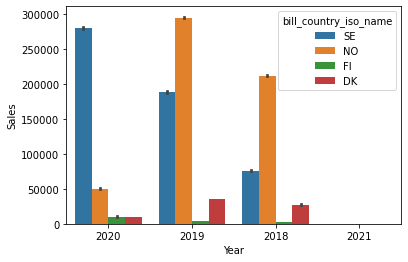

In [88]:
sns.barplot(x="Year", y="quantity", hue="bill_country_iso_name",data =orders,estimator=sum)
plt.title("Yearly orders with respect to Country")
plt.ylabel("Orders")
plt.xlabel("Year")

## Type 3: Using Day of the week as legend

Text(0.5, 0, 'Month')

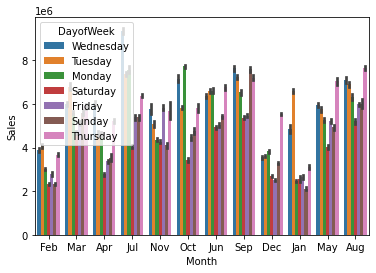

In [89]:
sns.barplot(x="Month", y="total", hue="DayofWeek",data =orders, estimator=sum)
plt.title("Monthly sales with respect to Day of the week")
plt.ylabel("Sales")
plt.xlabel("Month")

Text(0.5, 0, 'Month')

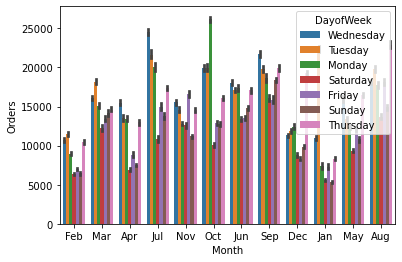

In [90]:
sns.barplot(x="Month", y="quantity", hue="DayofWeek",data =orders, estimator=sum)
plt.title("Monthly orders with respect to Day of the week")
plt.ylabel("Orders")
plt.xlabel("Month")

Text(0.5, 0, 'Country')

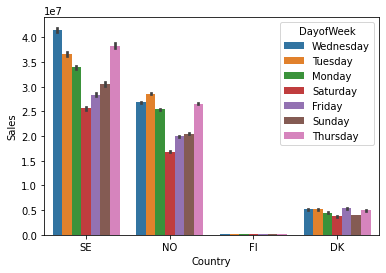

In [91]:
sns.barplot(x="bill_country_iso_name", y="total", hue="DayofWeek",data =orders, estimator=sum)
plt.title("Country sales with respect to Day of the week")
plt.ylabel("Sales")
plt.xlabel("Country")

Text(0.5, 0, 'Country')

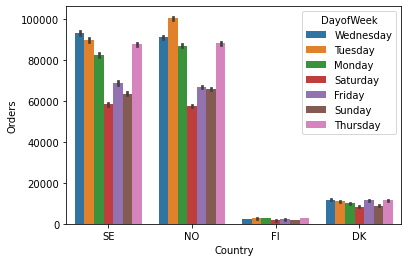

In [92]:
sns.barplot(x="bill_country_iso_name", y="quantity", hue="DayofWeek",data =orders,estimator=sum)
plt.title("Country orders with respect to Day of the week")
plt.ylabel("Orders")
plt.xlabel("Country")

Text(0.5, 0, 'Year')

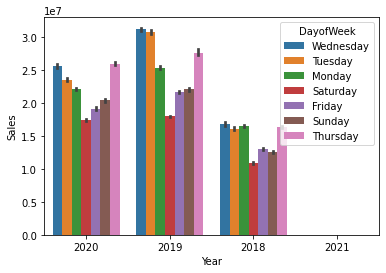

In [93]:
sns.barplot(x="Year", y="total", hue="DayofWeek",data =orders, estimator=sum)
plt.title("Yearly sales with respect to Day of the week")
plt.ylabel("Sales")
plt.xlabel("Year")

Text(0.5, 0, 'Year')

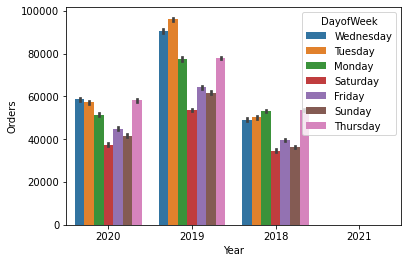

In [94]:
sns.barplot(x="Year", y="quantity", hue="DayofWeek",data =orders,estimator=sum)
plt.title("Yearly orders with respect to Day of the week")
plt.ylabel("Orders")
plt.xlabel("Year")

## Type 4: Top 10 products 

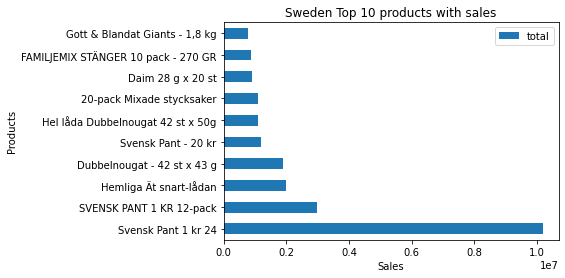

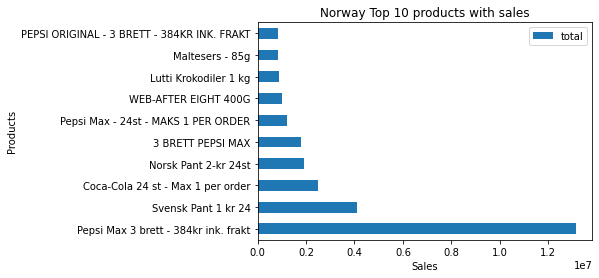

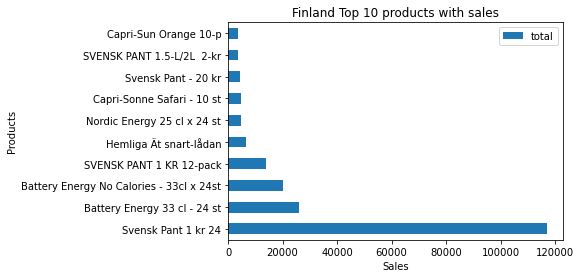

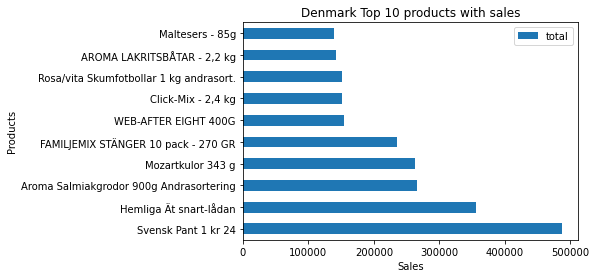

In [119]:
# Top 10 sales products with the country wise.
orders[orders['bill_country_iso_name']=='SE'].groupby(by=['product_name']).sum().drop(['quantity'],axis=1).sort_values(by=['total'],ascending=False).head(10).plot.barh()
plt.title("Sweden Top 10 products with sales")
plt.ylabel("Products")
plt.xlabel("Sales")
plt.show()

orders[orders['bill_country_iso_name']=='NO'].groupby(by=['product_name']).sum().drop(['quantity'],axis=1).sort_values(by=['total'],ascending=False).head(10).plot.barh()
plt.title("Norway Top 10 products with sales")
plt.ylabel("Products")
plt.xlabel("Sales")
plt.show()

orders[orders['bill_country_iso_name']=='FI'].groupby(by=['product_name']).sum().drop(['quantity'],axis=1).sort_values(by=['total'],ascending=False).head(10).plot.barh()
plt.title("Finland Top 10 products with sales")
plt.ylabel("Products")
plt.xlabel("Sales")
plt.show()

orders[orders['bill_country_iso_name']=='DK'].groupby(by=['product_name']).sum().drop(['quantity'],axis=1).sort_values(by=['total'],ascending=False).head(10).plot.barh()
plt.title("Denmark Top 10 products with sales")
plt.ylabel("Products")
plt.xlabel("Sales")
plt.show()


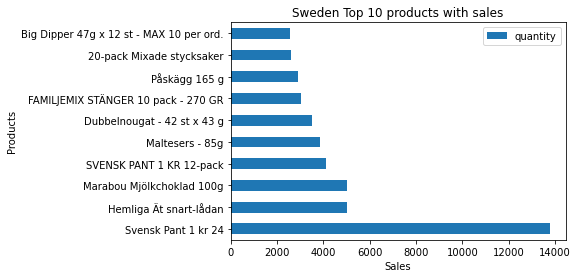

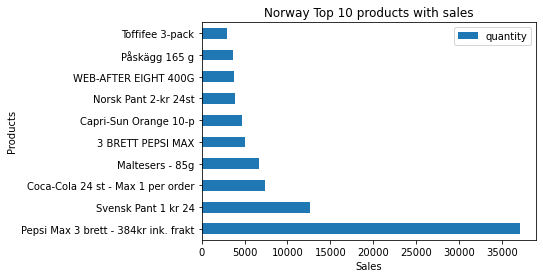

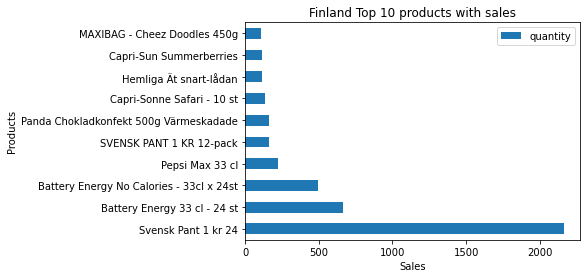

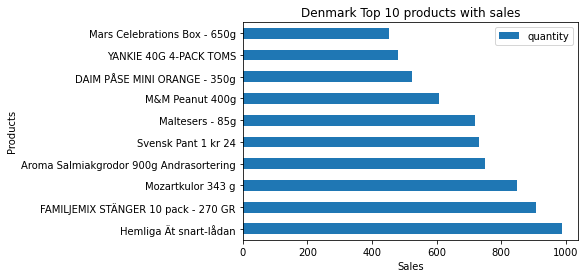

In [121]:
# Top 10 ordered products with the country wise.
orders[orders['bill_country_iso_name']=='SE'].groupby(by=['product_name']).sum().drop(['total'],axis=1).sort_values(by=['quantity'],ascending=False).head(10).plot.barh()
plt.title("Sweden Top 10 products with most orders")
plt.ylabel("Products")
plt.xlabel("Orders count")
plt.show()

orders[orders['bill_country_iso_name']=='NO'].groupby(by=['product_name']).sum().drop(['total'],axis=1).sort_values(by=['quantity'],ascending=False).head(10).plot.barh()
plt.title("Norway Top 10 products with most orders")
plt.ylabel("Products")
plt.xlabel("Orders count")
plt.show()

orders[orders['bill_country_iso_name']=='FI'].groupby(by=['product_name']).sum().drop(['total'],axis=1).sort_values(by=['quantity'],ascending=False).head(10).plot.barh()
plt.title("Finland Top 10 products with most orders")
plt.ylabel("Products")
plt.xlabel("Orders count")
plt.show()

orders[orders['bill_country_iso_name']=='DK'].groupby(by=['product_name']).sum().drop(['total'],axis=1).sort_values(by=['quantity'],ascending=False).head(10).plot.barh()
plt.title("Denmark Top 10 products with most orders")
plt.ylabel("Products")
plt.xlabel("Orders count")
plt.show()

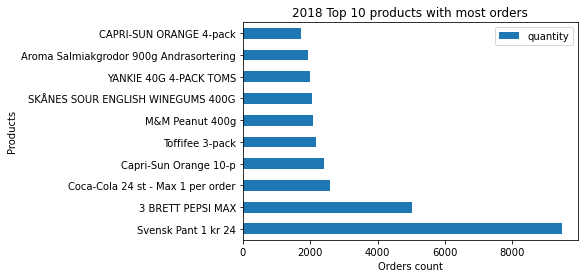

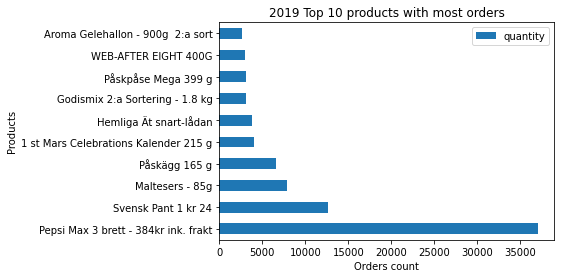

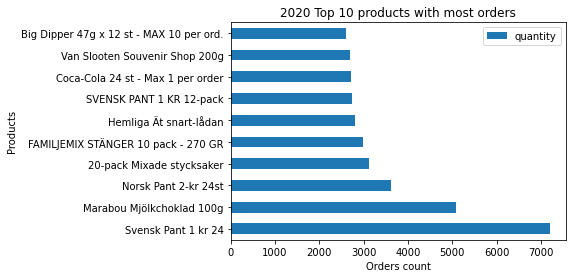

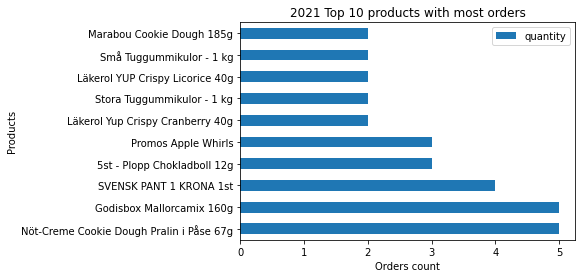

In [127]:
# Top 10 ordered products with the Year wise.
orders[orders['Year']=='2018'].groupby(by=['product_name']).sum().drop(['total'],axis=1).sort_values(by=['quantity'],ascending=False).head(10).plot.barh()
plt.title("2018 Top 10 products with most orders")
plt.ylabel("Products")
plt.xlabel("Orders count")
plt.show()

orders[orders['Year']=='2019'].groupby(by=['product_name']).sum().drop(['total'],axis=1).sort_values(by=['quantity'],ascending=False).head(10).plot.barh()
plt.title("2019 Top 10 products with most orders")
plt.ylabel("Products")
plt.xlabel("Orders count")
plt.show()

orders[orders['Year']=='2020'].groupby(by=['product_name']).sum().drop(['total'],axis=1).sort_values(by=['quantity'],ascending=False).head(10).plot.barh()
plt.title("2020 Top 10 products with most orders")
plt.ylabel("Products")
plt.xlabel("Orders count")
plt.show()

orders[orders['Year']=='2021'].groupby(by=['product_name']).sum().drop(['total'],axis=1).sort_values(by=['quantity'],ascending=False).head(10).plot.barh()
plt.title("2021 Top 10 products with most orders")
plt.ylabel("Products")
plt.xlabel("Orders count")
plt.show()

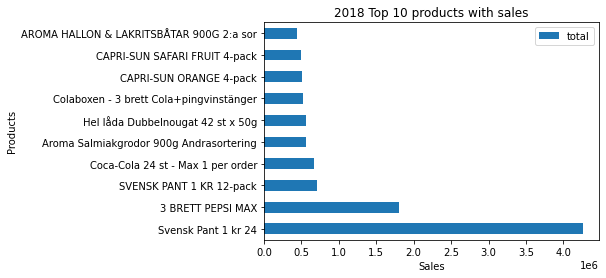

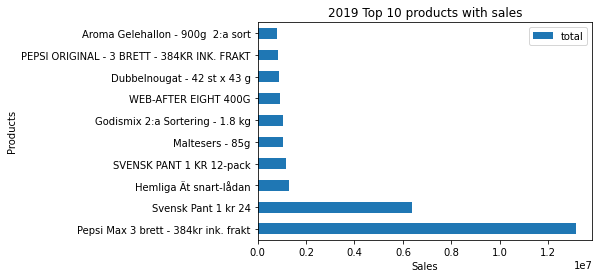

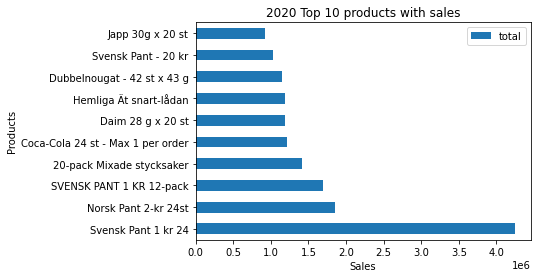

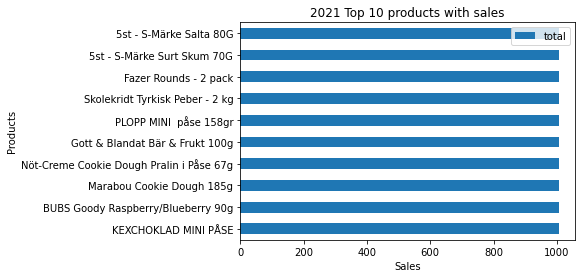

In [126]:
# Top 10 sales products with the country wise.
orders[orders['Year']=='2018'].groupby(by=['product_name']).sum().drop(['quantity'],axis=1).sort_values(by=['total'],ascending=False).head(10).plot.barh()
plt.title("2018 Top 10 products with sales")
plt.ylabel("Products")
plt.xlabel("Sales")
plt.show()

orders[orders['Year']=='2019'].groupby(by=['product_name']).sum().drop(['quantity'],axis=1).sort_values(by=['total'],ascending=False).head(10).plot.barh()
plt.title("2019 Top 10 products with sales")
plt.ylabel("Products")
plt.xlabel("Sales")
plt.show()

orders[orders['Year']=='2020'].groupby(by=['product_name']).sum().drop(['quantity'],axis=1).sort_values(by=['total'],ascending=False).head(10).plot.barh()
plt.title("2020 Top 10 products with sales")
plt.ylabel("Products")
plt.xlabel("Sales")
plt.show()

orders[orders['Year']=='2021'].groupby(by=['product_name']).sum().drop(['quantity'],axis=1).sort_values(by=['total'],ascending=False).head(10).plot.barh()
plt.title("2021 Top 10 products with sales")
plt.ylabel("Products")
plt.xlabel("Sales")
plt.show()

## Events data insights

### 1. Christmas Day

In [15]:
orders.head(2)

,admin_reference,payment_state,total,bill_city,bill_country_iso_name,product_name,quantity,sku,completed_at_y,Date,Time,Year,Month,Day,Hour,Minute,DayofWeek
1,O160651894,paid,97.21,Hafrsfjord,NO,AROMA Svartvinbärstoppar 900g,1,WEB7098,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,09,08,Thursday
2,O160651894,paid,97.21,Hafrsfjord,NO,AROMA HALLON & LAKRITSBÅTAR 900G 2:a sor,1,WEB7080,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,09,08,Thursday


In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862305 entries, 1 to 886932
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   admin_reference        862305 non-null  object        
 1   payment_state          862305 non-null  object        
 2   total                  862305 non-null  float64       
 3   bill_city              862305 non-null  object        
 4   bill_country_iso_name  862305 non-null  object        
 5   product_name           862305 non-null  object        
 6   quantity               862305 non-null  int64         
 7   sku                    862305 non-null  object        
 8   completed_at_y         862305 non-null  object        
 9   Date                   862305 non-null  datetime64[ns]
 10  Time                   862305 non-null  object        
 11  Year                   862305 non-null  object        
 12  Month                  862305 non-null  obje

In [24]:
#convert string to date
#orders.Date= pd.to_datetime(orders.Date)

#### Past pattern(Month)

In [95]:
#Previous data 
previous_2018 = orders[(orders['Date'] > '2018-12-01') & (orders['Date'] < '2018-12-25')]
previous_2019 = orders[(orders['Date'] > '2019-12-01') & (orders['Date'] < '2019-12-25')]
previous_2020 = orders[(orders['Date'] > '2020-12-01') & (orders['Date'] < '2020-12-25')]
#previous_2021 = orders[(orders['Date'] > '2021-12-01') & (orders['Date'] < '2021-12-25')]

In [110]:
orders.head(2)

,admin_reference,payment_state,total,bill_city,bill_country_iso_name,product_name,quantity,sku,completed_at_y,Date,Time,Year,Month,Day,Hour,Minute,DayofWeek
1,O160651894,paid,97.21,Hafrsfjord,NO,AROMA Svartvinbärstoppar 900g,1,WEB7098,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,09,08,Thursday
2,O160651894,paid,97.21,Hafrsfjord,NO,AROMA HALLON & LAKRITSBÅTAR 900G 2:a sor,1,WEB7080,2018-05-31 09:08,2018-05-31,09:08,2018,May,31,09,08,Thursday


In [112]:
orders['Day'] = orders['Day'].astype(int)
orders['total'] = pd.to_numeric(orders['total'])
orders['quantity'] = orders['quantity'].astype(int)
orders['Year'] = orders['Year'].astype(int)
orders['Hour'] = orders['quantity'].astype(int)
orders['Minute'] = orders['quantity'].astype(int)

In [117]:
previous = orders[(orders['Month'] == 'Dec') | (orders['Month'] == 'Nov')]

<AxesSubplot:xlabel='Day', ylabel='total'>

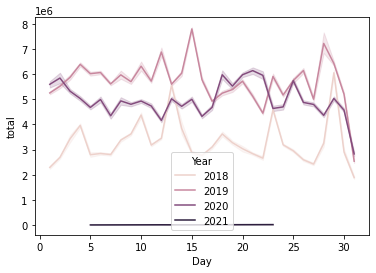

In [119]:
sns.lineplot(data = orders, x ="Day", y ="total" , hue = 'Year',estimator = sum)

<AxesSubplot:xlabel='Day', ylabel='total'>

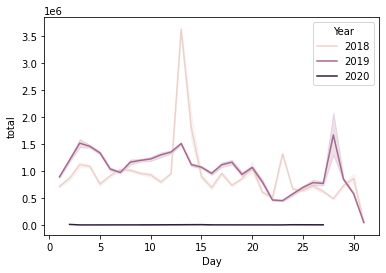

In [118]:
sns.lineplot(data = previous, x ="Day", y ="total" , hue = 'Year',estimator = sum)

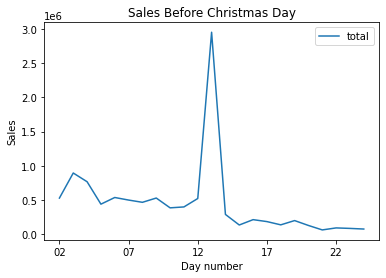

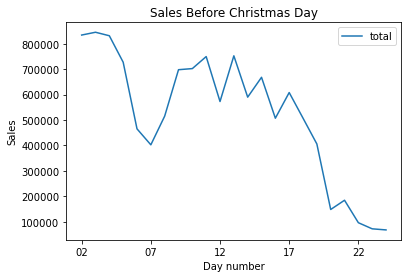

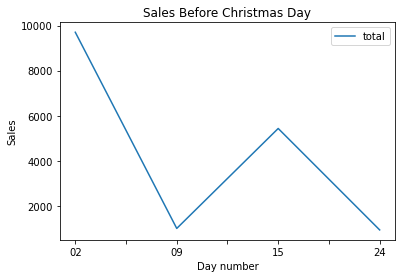

In [96]:
#sales by month
previous_2018.groupby(by=["Day"]).sum().drop(['quantity'],axis=1).sort_values(by=['Day'], ascending=True).plot.line(rot=0)
title = "2018 Sales Before Christmas Day"
x_axis = "Day number"
y_axis = "Sales"
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()
#sales by month
previous_2019.groupby(by=["Day"]).sum().drop(['quantity'],axis=1).sort_values(by=['Day'], ascending=True).plot.line(rot=0)
title = "2019 Sales Before Christmas Day"
x_axis = "Day number"
y_axis = "Sales"
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()
#sales by month
previous_2020.groupby(by=["Day"]).sum().drop(['quantity'],axis=1).sort_values(by=['Day'], ascending=True).plot.line(rot=0)
title = "2020 Sales Before Christmas Day"
x_axis = "Day number"
y_axis = "Sales"
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()
# #sales by month
# previous_2021.groupby(by=["Day"]).sum().drop(['quantity'],axis=1).sort_values(by=['Day'], ascending=True).plot.line(rot=0)
# title = "Sales Before Christmas Day"
# x_axis = "Day number"
# y_axis = "Sales"
# plt.title(title)
# plt.xlabel(x_axis)
# plt.ylabel(y_axis)
# plt.show()

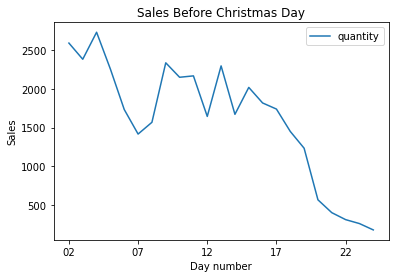

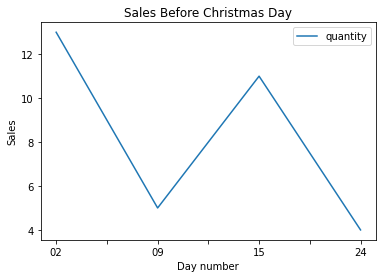

In [94]:
#orders by month
previous_2019.groupby(by=["Day"]).sum().drop(['total'],axis=1).sort_values(by=['Day'], ascending=True).plot.line(rot=0)
title = "Sales Before Christmas Day"
x_axis = "Day number"
y_axis = "Sales"
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()
#orders by month
previous_2020.groupby(by=["Day"]).sum().drop(['total'],axis=1).sort_values(by=['Day'], ascending=True).plot.line(rot=0)
title = "Sales Before Christmas Day"
x_axis = "Day number"
y_axis = "Sales"
plt.title(title)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()
# #orders by month
# previous_2021.groupby(by=["Day"]).sum().drop(['total'],axis=1).sort_values(by=['Day'], ascending=True).plot.line(rot=0)
# title = "Sales Before Christmas Day"
# x_axis = "Day number"
# y_axis = "Sales"
# plt.title(title)
# plt.xlabel(x_axis)
# plt.ylabel(y_axis)
# plt.show()

In [75]:
# Using plotly.express
import plotly.express as px
fig = px.bar(previous, x='Date', y="total")

fig.show()

<AxesSubplot:xlabel='Day', ylabel='total'>

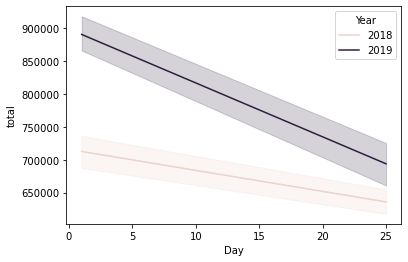

In [120]:
day_from = 1
day_to = 25
month_from = 'Nov'
month_to = 'Dec'
previous = orders[(orders['Month'] == month_from) | (orders['Month'] == month_to)]
previous = previous[(previous['Day'] == day_from) | (previous['Day'] == day_to)]

sns.lineplot(data = previous, x ="Day", y ="total" , hue = 'Year',estimator = sum)

In [ ]:
previous = orders[(orders['Date'] > '2013-01-01') & (orders['Date'] < '2013-02-01')]